## Exploratory Data Analysis (EDA) and Data Preprocessing (DP)

### EDA Imports

In [1]:
import sys
print(sys.version)
assert sys.version_info >= (3, 6)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

3.8.5 | packaged by conda-forge | (default, Aug 21 2020, 18:21:27) 
[GCC 7.5.0]


### DP Imports from sklearn

In [2]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split


## Regression Task

**Example:** I want to buy a car and I want to predict the miles per gallon (mpg). What features will
affect the mpg? Should I choose a manual or automatic transmission to get the best mpg? What type of carburetor?

**Data** ${((x_0,y_0),(x_1,y_1),...,(x_n,y_n)}, x_i \in R^d, y \in R$, n is the number of observations (i.e. samples)  

**y = f(x)**  y is a function of x, where x can be a single value (d=1) or a vector (d >1)  
**y = b + mx** for linear regression, b is the intercept and m is the slope, a vector of the coefficients. b and m are the parameters of the model

#### Types of Variables

* **Dependent Variable(y)**: a continuous real-valued quantity
    - Also called response variable, outcome variable, target variable
* **Independent Variable (x)** : continuous real-valued quantities and/or categorical (i.e. nominal) quantities
    - Also called features, predictors, explanatory variables
    

#### Goals

* **Prediction**: Predict dependent variable given the independent variables
* **Explanatory**: Determine the relationship of dependent variable to independent variable(s) 

### Read in data with Pandas into DataFrame

* Pandas can read data from files, urls, excel, clipboard, JSON, SAS, SQL, etc.
* Different file delimiters: Defaults to comma
* Does file have a header? Defaults to True
* You can select the columns: Defaults to all the columns

https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.read_csv.html#pandas.read_csv

#### From URL

In [3]:
url="https://raw.githubusercontent.com/cs109/2014_data/master/mtcars.csv"
cars = pd.read_csv(url) # Pandas version 0.19.2 or later
cars.tail()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


### Data Frames 
 
* The main data structure for data analysis
* Columns are variables, rows are observations
* Number of rows in each column must be the same
* Columns can be different data types
* Extensive set of methods
* Typically created by reading in a dataset
* Some packages have built-in datasets
* Three types of indexing
    - []  
    - .loc  
    - .iloc

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

* see Introduction/DataStructures&Visualization.ipynb for more info

In [4]:
# Some DataFrame atrributes

print('Size ',cars.size)
print('Shape ',cars.shape)

Size  384
Shape  (32, 12)


#### Columns of data frame are pandas series data structure

* A series is like a vector with names for the different elements

* A NumPy array (vector) and an index that labels each element in the vector.

In [5]:
mpg = cars.loc[:,'mpg']
print(f'Type of Column is {type(mpg)}')
mpg[0:5]

Type of Column is <class 'pandas.core.series.Series'>


0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
Name: mpg, dtype: float64

#### Add column to DataFrame and list column names

In [6]:
cars['hp2'] = cars.loc[:,'hp']**2  # loc indexing, assignment add column to dataframe
col_names = cars.columns.tolist()
col_names

['Unnamed: 0',
 'mpg',
 'cyl',
 'disp',
 'hp',
 'drat',
 'wt',
 'qsec',
 'vs',
 'am',
 'gear',
 'carb',
 'hp2']

#### Rename Column

In [7]:
cars.rename(columns={col_names[0]: "Make"},inplace=True)
cars.head()

,Make,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,hp2
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,12100
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,12100
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,8649
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,12100
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,30625


In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Make    32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
 12  hp2     32 non-null     int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 3.4+ KB


In [9]:
cars2 = cars.loc[:,['mpg','disp','hp','hp2','drat','wt']]
cars2.head()

,mpg,disp,hp,hp2,drat,wt
0,21.0,160.0,110,12100,3.90,2.620
1,21.0,160.0,110,12100,3.90,2.875
2,22.8,108.0,93,8649,3.85,2.320
3,21.4,258.0,110,12100,3.08,3.215
4,18.7,360.0,175,30625,3.15,3.440


### Descriptive Statistics

#### Goal: Predict mpg 

* Which variables to use as predictors????

In [10]:
cars2.describe()

,mpg,disp,hp,hp2,drat,wt
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,20.090625,230.721875,146.687500,26071.187500,3.596563,3.217250
std,6.026948,123.938694,68.562868,24295.284819,0.534679,0.978457
min,10.400000,71.100000,52.000000,2704.000000,2.760000,1.513000
25%,15.425000,120.825000,96.500000,9313.000000,3.080000,2.581250
50%,19.200000,196.300000,123.000000,15129.000000,3.695000,3.325000
75%,22.800000,326.000000,180.000000,32400.000000,3.920000,3.610000
max,33.900000,472.000000,335.000000,112225.000000,4.930000,5.424000


### Mean and Median: Measures of central tendency

#### Mean

<div style="font-size: 125%;">
$$\bar{x} = \frac{\sum^N_{i=1}{x_i}}{N}$$
</div>

* Average of the data
* "center of gravity"
* $\bar{x}$: x-bar is called the sample mean

#### Median
 
* The middle value of a set of observations
* The 50th percentile (quantile)
* More robust to outliers than the mean
* When length is odd, the middle data point is returned
* When length is even, the average of the two middle points is returned


### Standard Deviation, min, max and percentiles: Measures of Dispersion

#### Standard Deviation
 
* How much deviation from the mean?
* In same units as the data
* Square root of the variance
* Sample (s) versus population($\sigma$)

<div style="font-size: 115%;">
$$s=\sqrt{\frac{\sum^N_{i=1}{(x_i - \bar{x})^2}}{N-1}}\text{  }\sigma=\sqrt{\frac{\sum^N_{i=1}{(x_i - \bar{x})^2}}{N}}$$
</div>

#### Min and max

* Range of data
* Is variable positive, negative or both?

#### Percentiles

* Quantile: splits the data into equally sized groups

* Percentile: a measure indicating the value below which a given percentage of observations in a group of observations falls. 
    - A quantile that splits the data into 100 equally sized groups
    - 50% quantile (50th percentile): a value for which half of the values are less than the value
    - 10th percentile: a value for which 0.1 of the values are less than this value

### Correlation and Covariance
  

In [11]:
cars2.corr()

,mpg,disp,hp,hp2,drat,wt
mpg,1.000000,-0.847551,-0.776168,-0.664569,0.681172,-0.867659
disp,-0.847551,1.000000,0.790949,0.691552,-0.710214,0.887980
hp,-0.776168,0.790949,1.000000,0.972932,-0.448759,0.658748
hp2,-0.664569,0.691552,0.972932,1.000000,-0.318188,0.553352
drat,0.681172,-0.710214,-0.448759,-0.318188,1.000000,-0.712441
wt,-0.867659,0.887980,0.658748,0.553352,-0.712441,1.000000


*  Measures the strength and direction of a linear relationship between two variables. 
    - Do they both increase? both decrease?

<div style="font-size: 125%;">
$$Cov(X,Y) = \frac{1}{N}\sum^N_{i=1}(X_i-\bar{X})(Y_i-\bar{Y})$$ 
</div>

* Cov = 0 no relationship, if  > 0 then positive relationship, if < 0 then negative relationship
* Units are in terms of X and Y (i.e. apples times oranges)
* Pearson correlation coefficient (standardize the covariance)  
    - varies between -1 and + 1
<div style="font-size: 125%;">
$$ r = \frac{Cov(X,Y)}{\sigma_X \sigma_Y}$$
</div>

![](Correlation.png)

### Visualizations

#### Check distribution of dependent variable

* Is dependent variable Normally distributed? 

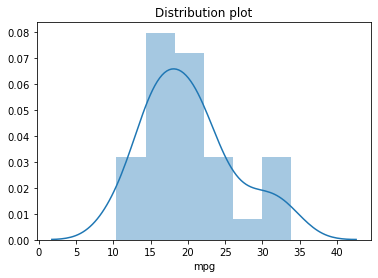

In [12]:
sns.distplot(cars2.loc[:,'mpg']) # Histogram and Kernel Density (kde=True); shift-tab to see function arguments
plt.title('Distribution plot');  # semicolon supresses displaying function return

#### Plot dependent variable as a function of an independent variable (scatter plot)

* What is their strength of association
    - Covariance
    - Correlation


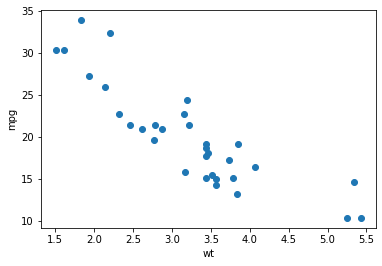

In [13]:
plt.plot(cars2.loc[:,'wt'],cars2.loc[:,'mpg'],'o')
plt.xlabel('wt')
plt.ylabel('mpg');

## Data Preprocessing



### Missing Values

* Generally indicated by NaN in Python
    - May be an extreme value like 9999
* Delete Row
    - In general this is not a good idea unless have lots of repeated measures
* Fill in with the column mean, median, or mode
* Fill in with mean of neighboring items 
* When using a statistic fit imputer to training data.
    - Transform both the training data and test data with the fit imputer
    
#### Check for Missing Values

In [14]:
np.sum(cars2.isna())

mpg     0
disp    0
hp      0
hp2     0
drat    0
wt      0
dtype: int64

In [15]:
cars2.isna().sum()

mpg     0
disp    0
hp      0
hp2     0
drat    0
wt      0
dtype: int64

### Transform data variables to dependent and independent variables in Numpy arrays

#### Numpy N-dimensionsal Arrays (tensors)

* A N-dimensional array is defined by 3 attributes
    - ndim: Number of axes (dimensionality of tensor) (often called the rank of the tensor)
    - shape: tuple of integers containing number of dimensions along each axis
    - dtype: the type of data contained in the tensor
    
Note:  Dimensionality can denote either the number of entries along a specific axis or the number of axes in a tensor(i.e. the number of direction required to describe it)

In [16]:
X = cars2.iloc[:,1:].values  # Matrix of Independent Variables
print(f'X shape: {X.shape}, X dimension {X.ndim}')

y = cars2.loc[:,'mpg'].values # Vector of the dependent variab;e
print(y.shape)
y = y.reshape(-1,1) # -1 means use current value
print(f'y shape: {y.shape}, y dimension {y.ndim}')

X shape: (32, 5), X dimension 2
(32,)
y shape: (32, 1), y dimension 2


In [17]:
X[0,:]

array([1.60e+02, 1.10e+02, 1.21e+04, 3.90e+00, 2.62e+00])

#### Numpy indexing

https://docs.scipy.org/doc/numpy-1.13.0/user/basics.indexing.html

In [18]:
y[:5]

array([[21. ],
       [21. ],
       [22.8],
       [21.4],
       [18.7]])

#### Split the data

* Train the model on one set of data (the training set)
* To test how well the model will generalize, we test it on a different set (the test set)
* We do this to guard against overfitting the model
    - The model relies to much on the features of the data in the training set.
        - It may be an unusual sample
* Setting random state allows you to duplicate the random splitting

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=1234)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((25, 5), (7, 5), (25, 1), (7, 1))

### Scale the data

https://sebastianraschka.com/Articles/2014_about_feature_scaling.html


* Many learning algorithms perform better if data is in range (0,1)
* Some learning algorithms require normalized data
    - Euclidean distance measures 
    
#### Standardization

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

- Z-scores 
- mean =  0, standard deviation = 1
        
$$\frac{x - mean(x)}{standardDeviation(x)}$$


#### Normalization (Min-max scaling)

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler

- Scale all features to (0,1)
- Robust to very small standard deviations of features and preserves zero entries in sparse data.
        
$$ \frac{x - min(x)}{max(x) - min(x)}$$
 

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape,X_test.shape

((25, 5), (7, 5))

* Why fit and transform the training data, but only transform the test data?

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print(f'Intercept: {model.intercept_} Slope: {model.coef_[0]} ')

Intercept: [19.632] Slope: [ 0.35746759 -8.2576801   5.3387625   0.69567494 -2.86368644] 


## Classification Task

**Example:** How did the survivors of the titanic differ from those that didn't survive. Can be predict whether a person survived or not? What features would be the best predictors of survival?

* **Data** ${((x_0,y_0),(x_1,y_1),...,(x_n,y_n)}, x_i \in R^d, y \in {0,1} $  
**y = f(x)**  y is a function of x, where x can be a single value (d=1) or a vector (d >1) 


#### Types of Variables

* **Dependent Variable(y)**: a **categorical** variable 
    - Nominal Variable, discrete
    - Also called response variable, outcome variable
* **Independent Variable(x)**: continuous real-valued quantities and/or categorical (i.e. nominal) quantities
    - Also called features, predictors, explanatory variables

#### Goals

* **Prediction**: Classify the dependent variable given the independent variables
* Output probability of belonging to a class


#### Read the data

In [22]:
titanic = pd.read_csv("titanic.csv")
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


#### Goal: Predict survival based on the other features

* The Dependent or Target Variable is 'survived'. 
    - It is a **Categorical Variable**.
* Which features will be the independent variables?

### Filter data using DataFrame query method

In [23]:
titanic = titanic.loc[:,['survived','sex','age','fare','class']]
titanic.head()

,survived,sex,age,fare,class
0,0,male,22.0,7.2500,Third
1,1,female,38.0,71.2833,First
2,1,female,26.0,7.9250,Third
3,1,female,35.0,53.1000,First
4,0,male,35.0,8.0500,Third


In [24]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   sex       891 non-null    object 
 2   age       714 non-null    float64
 3   fare      891 non-null    float64
 4   class     891 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 34.9+ KB


In [25]:
np.sum(titanic.isnull())

survived      0
sex           0
age         177
fare          0
class         0
dtype: int64

In [26]:
titanic = titanic.dropna()
np.sum(titanic.isnull())

survived    0
sex         0
age         0
fare        0
class       0
dtype: int64

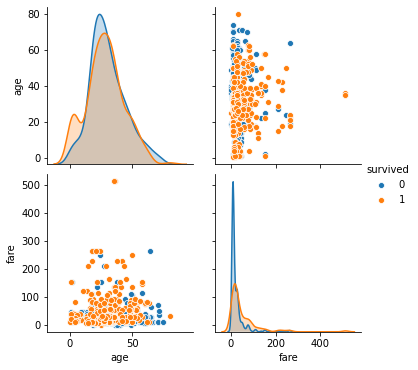

In [27]:
sns.pairplot(titanic,diag_kind='kde',hue= 'survived');

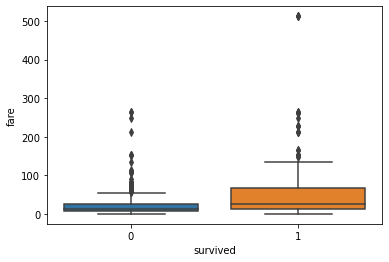

In [28]:
sns.boxplot(x='survived',y='fare',data=titanic);

### Categorical Variables

* Nominal variables : name a class(i.e. category)
    - Gender, species, letter grades, number of cylinders
    - Each value is called a level
        - e.g. gender has 2 levels, letter grades (A- F) has 5 levels
* Can be a word or a number
* Can be dependent (response) and/or independent (predictor) variable
* Need to encode for use in mathematical equations

#### Different ways to encode

* Label encoding, 2 levels
    - x is gender 'male','female'
    - $x_i$ = 1 if ith subject is female
      $x_i$ = 0 if ith subject is male

* One hot encoding (also known as 1-of-k encoding)
    - When more than two levels
    - Code each level a binary variable
        - if three levels then have three variable
        
* Dummy Variable Trap
    - When use one hot encoding, can determine one of the variable from the other k-1 variables therefore they will be highly correlated.
    - Eliminate one of the variables
  

  
#### Python packages for encoding categorical variables

* Scikit Learn (sklearn)
* Pandas
    - https://pbpython.com/categorical-encoding.html
    

#### Titanic dataset

* Dependent variable 'survived' is already encoded
* Independent variable 'sex' has two levels
* Independent variable 'class' has three levels

#### Pandas label encoder

In [29]:
titanic.loc[:,'sex'] = pd.Categorical(titanic['sex']).codes 
titanic.head()

,survived,sex,age,fare,class
0,0,1,22.0,7.2500,Third
1,1,0,38.0,71.2833,First
2,1,0,26.0,7.9250,Third
3,1,0,35.0,53.1000,First
4,0,1,35.0,8.0500,Third


#### sklearn label encoder

In [30]:
labelencoder = LabelEncoder()
titanic.loc[:,'class'] = labelencoder.fit_transform(titanic.loc[:,'class'])
titanic.head()

,survived,sex,age,fare,class
0,0,1,22.0,7.2500,2
1,1,0,38.0,71.2833,0
2,1,0,26.0,7.9250,2
3,1,0,35.0,53.1000,0
4,0,1,35.0,8.0500,2


In [31]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  714 non-null    int64  
 1   sex       714 non-null    int8   
 2   age       714 non-null    float64
 3   fare      714 non-null    float64
 4   class     714 non-null    int64  
dtypes: float64(2), int64(2), int8(1)
memory usage: 48.6 KB


#### pandas one-hot-encoding

In [32]:
titanic2 = pd.get_dummies(titanic,columns=['class'],drop_first=True)
titanic2.head()

,survived,sex,age,fare,class_1,class_2
0,0,1,22.0,7.2500,0,1
1,1,0,38.0,71.2833,0,0
2,1,0,26.0,7.9250,0,1
3,1,0,35.0,53.1000,0,0
4,0,1,35.0,8.0500,0,1


* drop_first = True to reduce correlation of predictors (i.e.The Dummy Variable Trap)

#### Convert predictors to numpy array

In [33]:
X = titanic2.iloc[:,1:].values  # Matrix of Independent Variables
print(f'X shape: {X.shape}, X dimension {X.ndim}')

X shape: (714, 5), X dimension 2


In [34]:
X[0,:]

array([ 1.  , 22.  ,  7.25,  0.  ,  1.  ])

#### sklearn One-hot encoding



In [35]:
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [3])],remainder='passthrough')
X = transformer.fit_transform(titanic.iloc[:,1:])
X = X[:,1:] # Dummy variable trap
X[0,:]

array([ 0.  ,  1.  ,  1.  , 22.  ,  7.25])

#### Convert response variable to vector

* For sklearn will work if left as pandas series

In [36]:
y = titanic.loc[:,'survived'].values # Vector of the dependent variab;e
y = y.reshape(-1,1) # -1 means use current value
print(f'y shape: {y.shape}, y dimension {y.ndim}')

y shape: (714, 1), y dimension 2


### Split the data

* Setting stratify = y ensures that proportion of 

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y,random_state=1234)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((571, 5), (143, 5), (571, 1), (143, 1))

### Scale the data


In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)
X_train.shape,X_test.shape

((571, 5), (143, 5))

### PyTorch 


#### Convert data into torch tensors

* Objects that are extensions of numpy arrays that facilitate execution on GPUs and Automatic Differentiation

In [39]:
import torch

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

ModuleNotFoundError: No module named 'torch'

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

### Excercise

#### 1. Encode the 'am' and 'cyl' variables in the cars dataset

### Dataset Links

#### Dataset search
https://datasetsearch.research.google.com/  
https://datasets.bifrost.ai/?ref=producthunt 

#### Sites

https://www.kdnuggets.com/2017/12/big-data-free-sources.html  
http://archive.ics.uci.edu/ml/index.php  
https://www.kaggle.com/datasets  
https://msropendata.com/  
https://data.giss.nasa.gov/  


### Reference

Pandas version 0.25.3 (current version 1.0.5) https://pandas.pydata.org/pandas-docs/version/0.25.3/pandas.pdf